In [4]:
import os.path as osp

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Init path 
root_path_data = "./assets/mvadlmi/"
annotations = osp.join(root_path_data, "train.csv")

df_train_raw = pd.read_csv(annotations)

df_train_raw.head()

,image_id,data_provider,isup_grade,gleason_score
0,995df9b93db1e396b57692c6c7f1d673,radboud,0,negative
1,86d4621be3deca4f8d461e3abce7d585,radboud,4,4+4
2,e2578d331ae6cb3bc649027498c8ff8d,radboud,1,3+3
3,c65fcde885b4f231d03cefb0fc75f4fa,radboud,4,4+4
4,c4bbe05f5d77f1a42bc95191285ab1bb,radboud,3,4+3


In [6]:
path_test = osp.join(root_path_data, "test.csv")

df_test_raw = pd.read_csv(path_test)

df_test_raw.head()

,image_id,data_provider
0,254fbd7f21925ba7732800213af7ed47,radboud
1,8a76998072bccebf4c6f78ff7cc7b94e,karolinska
2,7e81ad62302e6eabe1230d2d9d604881,karolinska
3,3b343b8c4e2a854735a82bcebe482a14,karolinska
4,1115d114a4339de8dd9f36d6465c6d57,karolinska


## Data exploration

### Distribution over providers for the train set and the test set

/home/clement/anaconda3/envs/torch1.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


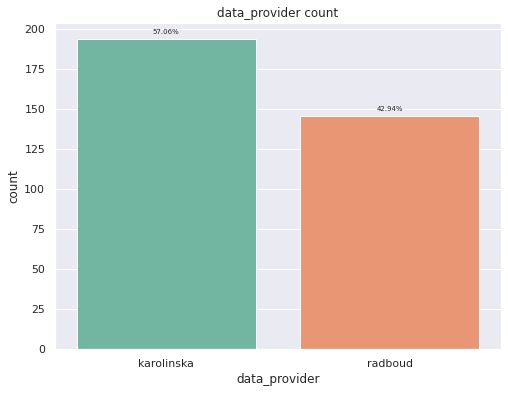

In [19]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(df[feature], order = df[feature].value_counts().index, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center", fontsize="xx-small") 
    sns.set(font_scale=1.0)
    plt.show()

plot_count(df=df_train_raw, feature='data_provider', title = 'data_provider count')

/home/clement/anaconda3/envs/torch1.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


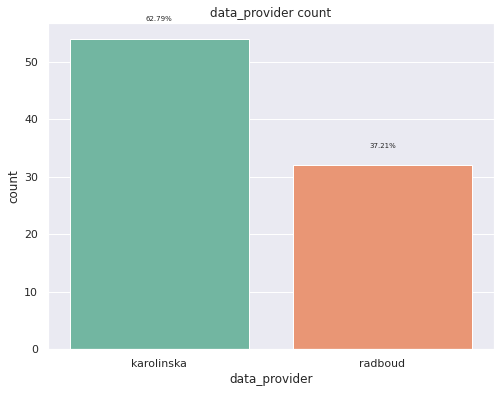

In [20]:
plot_count(df=df_test_raw, feature='data_provider', title = 'data_provider count')

### Distribution over classes

/home/clement/anaconda3/envs/torch1.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


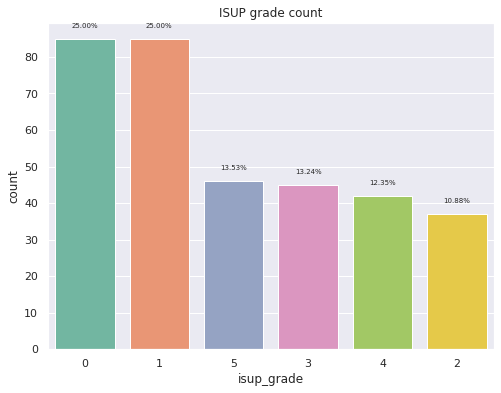

In [21]:
plot_count(df=df_train_raw, feature='isup_grade', title = 'ISUP grade count')

### Gleason score distribution 

/home/clement/anaconda3/envs/torch1.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


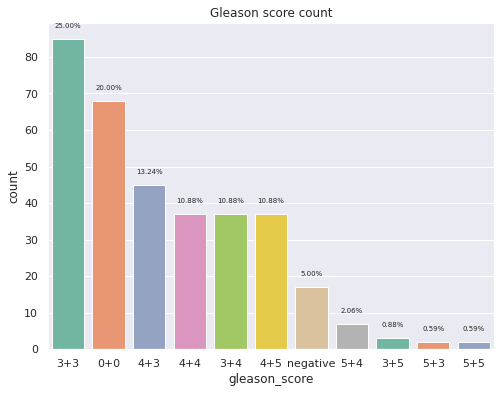

In [22]:
plot_count(df=df_train_raw, feature='gleason_score', title = 'Gleason score count')

## Relative distributions

In [39]:
def plot_relative_distribution(df, feature, hue, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(x=feature, hue=hue, data=df, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 1,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    sns.set(font_scale=0.8)
    plt.show()

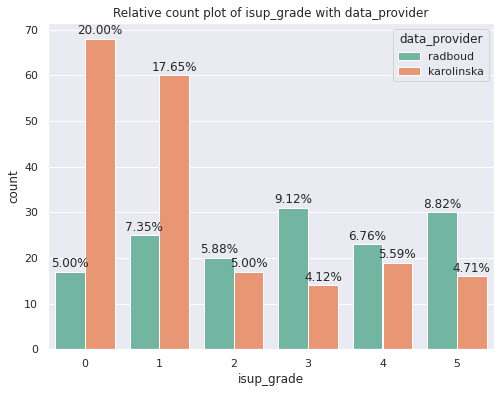

In [40]:
plot_relative_distribution(df=df_train_raw, feature='isup_grade', hue='data_provider', title = 'Relative count plot of isup_grade with data_provider', size=2)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


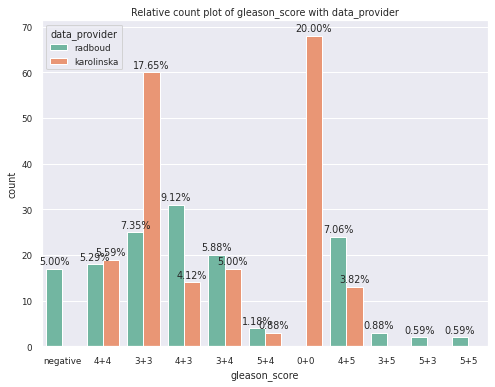

In [42]:
plot_relative_distribution(df=df_train_raw, feature='gleason_score', hue='data_provider', title = 'Relative count plot of gleason_score with data_provider', size=2)